In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("report.csv", delimiter=',')

In [16]:
data

,Layers,Activation,Average Score,Average Accuracy
0,16-32-64-16,sigmoid-sigmoid-sigmoid-sigmoid,18.6,0.941923
1,16-32-64-16,relu-relu-relu-relu,40.2,0.994693
2,16-32-64-16,elu-elu-elu-elu,20.4,0.994028
3,16-32-64-16,relu-sigmoid-relu-sigmoid,36.0,0.988430
4,16-32-64-16,relu-relu-sigmoid-sigmoid,29.4,0.990971
5,16-32-64-16,sigmoid-relu-relu-sigmoid,31.6,0.983006
6,16-32-64-16,sigmoid-sigmoid-relu-relu,35.6,0.991387
7,16-32-64-16,elu-sigmoid-elu-sigmoid,27.4,0.988521
8,16-32-64-16,elu-elu-sigmoid-sigmoid,28.6,0.983008
9,16-32-64-16,sigmoid-elu-elu-sigmoid,26.6,0.987471


In [28]:
X = data['Average Score']
Y = data['Average Accuracy']

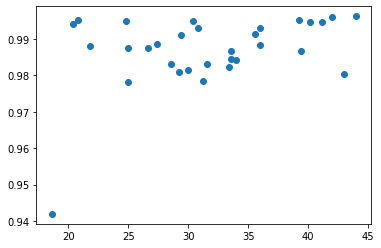

In [30]:
plt.scatter(X,Y)

In [21]:
plt.show()